In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [65]:
def clean_data_draft(df):
    return df.dropna(subset=['WS/48', 'VORP'])

def makeDraftDF():
    
    file_list = []
    for i in range(7,21):
        file_list.append("draft/"+str(i)+".csv")

    df_list = []
    for file in file_list:
        df_list.append(clean_data_draft(pd.read_csv(file)))

    return pd.concat(df_list, ignore_index=True)

draft = makeDraftDF()
draft = draft[draft["Pk"] <= 30]
draft["lottery"] = draft.apply(lambda x: x["Pk"] <= 14, axis=1)
contractScale = pd.read_csv("rookieContractScale.csv")
contractScale["total"] = contractScale.apply(lambda x: x["year1"]+x["year2"]+x["year3"],axis=1)
firstpickValue = 28631600
contractScale["scale"] = contractScale.apply(lambda x: x["total"]/firstpickValue,axis=1)
contractScale["millions"] = contractScale.apply(lambda x: x["total"]/1000000,axis=1)

scale = contractScale["scale"].values.tolist()
money = contractScale["millions"].values.tolist()
draft.head()
# scale[:5]
# money[:5]


,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,lottery
0,1,1,POR,Greg Oden,Ohio State,3.0,105.0,2028.0,840.0,656.0,...,0.658,19.3,8.0,6.2,0.5,7.3,0.174,-0.4,0.8,True
1,2,2,SEA,Kevin Durant,Texas,15.0,981.0,36010.0,26764.0,6930.0,...,0.886,36.7,27.3,7.1,4.3,161.5,0.215,6.8,80.0,True
2,3,3,ATL,Al Horford,Florida,16.0,1006.0,32331.0,13541.0,8117.0,...,0.759,32.1,13.5,8.1,3.3,105.9,0.157,2.9,40.1,True
3,4,4,MEM,Mike Conley,Ohio State,16.0,1016.0,32368.0,14880.0,3027.0,...,0.820,31.9,14.6,3.0,5.7,91.4,0.136,2.4,35.9,True
4,5,5,BOS,Jeff Green,Georgetown,15.0,1099.0,31388.0,13665.0,4624.0,...,0.803,28.6,12.4,4.2,1.5,51.6,0.079,-1.4,4.4,True


In [66]:
draft["adjusted_WS"] = draft.apply(lambda x: x["WS"]/scale[x["Pk"]-1],axis=1)
draft["adjusted_VORP"] = draft.apply(lambda x: x["VORP"]/scale[x["Pk"]-1],axis=1)
draft["WS_per_million"] = draft.apply(lambda x: x["WS"]/money[x["Pk"]-1],axis=1)
draft["VORP_per_million"] = draft.apply(lambda x: x["VORP"]/money[x["Pk"]-1],axis=1)

asdf = draft[["Pk", "Player", "WS", "VORP", "adjusted_WS", "adjusted_VORP", "WS_per_million", "VORP_per_million"]]
asdf = asdf.sort_values(by="adjusted_WS", ascending=False)

asdf.head(20)
# draft[["Pk", "Player", "WS", "VORP", "adjusted_WS", "adjusted_VORP"]].sort_values(by="adjusted_VORP", ascending=False)


,Pk,Player,WS,VORP,adjusted_WS,adjusted_VORP,WS_per_million,VORP_per_million
229,30,Jimmy Butler,104.4,43.5,526.062378,219.192658,18.373489,7.655620
336,27,Rudy Gobert,93.5,29.1,461.457708,143.619458,16.117077,5.016117
73,26,George Hill,70.7,19.3,338.883719,92.509983,11.836004,3.231045
71,24,Serge Ibaka,73.0,15.7,324.742364,69.841851,11.342096,2.439328
72,25,Nicolas Batum,66.4,26.9,307.717173,124.662530,10.747467,4.354019
124,26,Taj Gibson,59.7,7.1,286.157822,34.032170,9.994475,1.188623
324,15,Giannis Antetokounmpo,95.2,47.9,282.766567,142.274354,9.876031,4.969137
385,25,Clint Capela,58.9,14.3,272.959962,66.270415,9.533521,2.314590
214,15,Kawhi Leonard,89.3,43.4,265.242168,128.908288,9.263966,4.502308
105,7,Stephen Curry,126.7,65.0,232.946145,119.506704,8.135981,4.173944


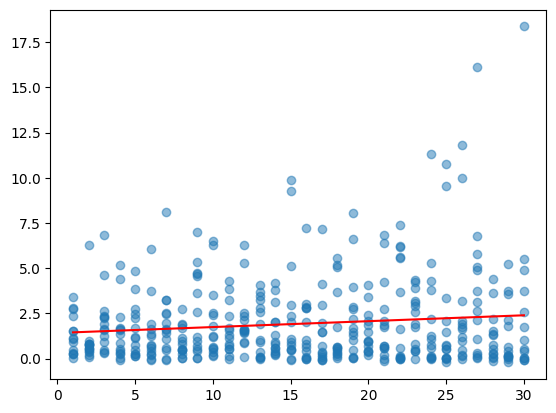

In [56]:
model = LinearRegression()
model.fit(draft['Pk'].values.reshape(-1, 1), draft["WS_per_million"])
predicted_WS_per_million = model.predict(draft['Pk'].values.reshape(-1, 1))
    
plt.plot(draft['Pk'], predicted_WS_per_million, color='red')
plt.scatter(draft["Pk"], draft["WS_per_million"], alpha=0.5)
plt.show()

RanksumsResult(statistic=0.29063407132600927, pvalue=0.7713311991886364)


<function matplotlib.pyplot.show(close=None, block=None)>

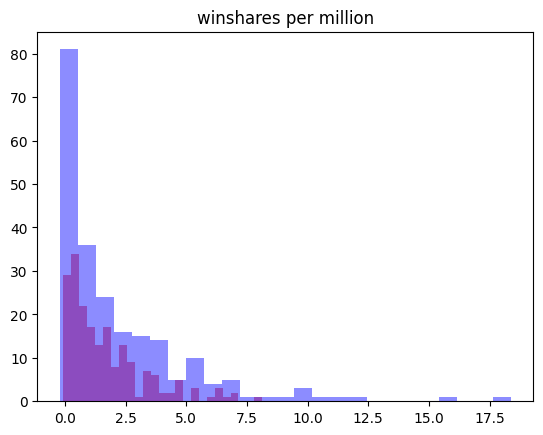

In [67]:
from scipy.stats import ranksums

lottery = draft[draft["lottery"] == True]["WS_per_million"]
notlottery = draft[draft["lottery"] == False]["WS_per_million"]
ranksumResult = ranksums(lottery,notlottery)
print(ranksumResult)

plt.title("winshares per million")
plt.hist(lottery, bins=25, alpha=0.45, color='red')
plt.hist(notlottery, bins=25, alpha=0.45, color='blue')
plt.show